# CYBERML: Fraud Detection- Lab session 1

`Raphaël Bennaïm
ING3 - SCIA
PROMO 2024
`

## Imports

In [425]:
import pandas as pd
import numpy as np

from mlsecu.data_exploration_utils import *
from mlsecu.anomaly_detection_use_case import *
from mlsecu.data_exploration_utils import *

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Loading Data

3. Load the CSV files as ‘train_transaction.csv’ using Pandas

In [426]:
train_transaction = pd.read_csv('train_transaction.csv')

4. From `train_transaction` keep 10000 entries: the first 9700 non-fraud entries and the first 300 fraud entries in dataset `reduced_transaction_df`

In [427]:
reduced_transaction_df = pd.concat([train_transaction[train_transaction['isFraud'] == 0][:9700], train_transaction[train_transaction['isFraud'] == 1][:300]])

## Data set observation

5. Print the head of the dataset

In [428]:
reduced_transaction_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


6. List following information for the training set
* Column number
* Column names (all should be visible in a line, not in a column)
* Length of the data set
* For each column name, its type (show all values)

In [429]:
print("Number of columns in the dataframe: ", get_nb_of_dimensions(reduced_transaction_df))

Number of columns in the dataframe:  394


In [430]:
print("Column names of the dataframe: ", get_column_names(reduced_transaction_df).to_list())

Column names of the dataframe:  ['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77'

In [431]:
print("Length of the dataframe: ", get_nb_of_rows(reduced_transaction_df))

Length of the dataframe:  10000


In [432]:
reduced_transaction_df.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
V335              float64
V336              float64
V337              float64
V338              float64
V339              float64
Length: 394, dtype: object

7. Control the correct extraction of `transaction`: number of non-fraudulent transactions, number of fraudulent transactions, rate of fraudulent transactions

In [433]:
non_fraudulent_transactions = reduced_transaction_df[reduced_transaction_df['isFraud'] == 0]
print("Number of non-fraudulent transactions: ", get_nb_of_rows(non_fraudulent_transactions))

Number of non-fraudulent transactions:  9700


In [434]:
fraudulent_transactions = reduced_transaction_df[reduced_transaction_df['isFraud'] == 1]
print("Number of fraudulent transactions: ", get_nb_of_rows(fraudulent_transactions))

Number of fraudulent transactions:  300


In [435]:
print("Rate of fraudulent transactions: ", get_nb_of_rows(fraudulent_transactions) / get_nb_of_rows(reduced_transaction_df))

Rate of fraudulent transactions:  0.03


8. Which columns are categories? List them (show all column names); extract and show existing values.

In [436]:
categorical_columns = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']
print(categorical_columns)

['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']


Here we print all unique existing values for `categorical` columns

In [437]:
for column in categorical_columns:
    print(column, get_unique_values(reduced_transaction_df, column), sep='\n', end='\n\n')


ProductCD
['W' 'H' 'C' 'S' 'R']

card1
[13926  2755  4663 ... 16208 13593  4993]

card2
[ nan 404. 490. 567. 514. 555. 360. 100. 111. 352. 375. 418. 303. 314.
 543. 583. 148. 321. 269. 361. 272. 399. 569. 453. 417. 512. 545. 266.
 114. 481. 452. 547. 383. 170. 343. 556. 285. 562. 302. 264. 558. 500.
 396. 103. 206. 143. 243. 476. 199. 174. 423. 446. 492. 523. 440. 528.
 161. 535. 354. 117. 455. 325. 158. 268. 122. 479. 147. 215. 480. 265.
 388. 408. 309. 415. 414. 437. 104. 225. 101. 134. 586. 191. 491. 369.
 322. 494. 532. 313. 474. 324. 475. 298. 429. 432. 553. 566. 599. 296.
 251. 310. 242. 204. 250. 270. 346. 316. 194. 587. 390. 135. 536. 254.
 226. 327. 420. 260. 413. 428. 561. 387. 411. 392. 203. 297. 136. 276.
 142. 527. 210. 184. 459. 118. 585. 106. 588. 449. 176. 177. 246. 439.
 503. 445. 172. 468. 239. 496. 533. 370. 578. 150. 458. 365. 359. 509.
 202. 584. 258. 442. 530. 489. 529. 504. 356. 123. 205. 382. 155. 105.
 422. 345. 257. 171. 559. 271. 554. 127. 236. 548. 454. 373.

9. Which columns are numeric? List them (show all column names); extract and show min, max, mean, median and standard deviation values.

In [438]:
numerical_columns = get_number_column_names(reduced_transaction_df)
print(numerical_columns)

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V

Here we extract for each `numeric` column the min, max, mean, median and standard deviation values.

In [439]:
def compute_statistics(df, column):
    return df[column].min(), df[column].max(), df[column].mean(), df[column].median(), df[column].std()

for column in numerical_columns:
    print(column, compute_statistics(reduced_transaction_df, column), sep='\n', end='\n\n')

TransactionID
(2987000, 2998173, 2992001.5478, 2991999.5, 2890.704121826922)

isFraud
(0, 1, 0.03, 0.0, 0.1705957510931298)

TransactionDT
(86400, 333007, 186946.3074, 171644.0, 56659.00950304984)

TransactionAmt
(1.896, 3247.91, 131.6979619, 74.97, 215.32289719162787)

card1
(1011, 18390, 9821.7253, 9500.0, 4778.438460151146)

card2
(100.0, 600.0, 349.2980058710396, 327.0, 157.70613947944958)

card3
(100.0, 225.0, 152.74767476747675, 150.0, 10.214671127602855)

card5
(100.0, 237.0, 200.3395810363837, 224.0, 39.07570261977926)

addr1
(110.0, 536.0, 292.4080352228949, 299.0, 103.69367740279289)

addr2
(87.0, 96.0, 87.00693450742983, 87.0, 0.24973855242108892)

dist1
(0.0, 4474.0, 116.26256652868125, 8.0, 345.5843213615635)

dist2
(0.0, 5521.0, 292.6213333333333, 38.0, 620.4560515001342)

C1
(0.0, 735.0, 8.3859, 1.0, 34.55383593680729)

C2
(0.0, 808.0, 7.9132, 1.0, 34.39154756061963)

C3
(0.0, 8.0, 0.0101, 0.0, 0.1288396288608303)

C4
(0.0, 538.0, 0.8104, 0.0, 17.014047126417694)

C5
(0.

10. For each column, print the rate of undefined values (NaN for numeric)

In [440]:
for col in reduced_transaction_df.columns:
    nan_rate = reduced_transaction_df[col].isna().mean() * 100
    print(f'{col}: {nan_rate:.2f}% NaN values')
    

TransactionID: 0.00% NaN values
isFraud: 0.00% NaN values
TransactionDT: 0.00% NaN values
TransactionAmt: 0.00% NaN values
ProductCD: 0.00% NaN values
card1: 0.00% NaN values
card2: 1.21% NaN values
card3: 0.01% NaN values
card4: 0.01% NaN values
card5: 0.23% NaN values
card6: 0.01% NaN values
addr1: 9.15% NaN values
addr2: 9.15% NaN values
dist1: 66.18% NaN values
dist2: 96.25% NaN values
P_emaildomain: 20.99% NaN values
R_emaildomain: 83.66% NaN values
C1: 0.00% NaN values
C2: 0.00% NaN values
C3: 0.00% NaN values
C4: 0.00% NaN values
C5: 0.00% NaN values
C6: 0.00% NaN values
C7: 0.00% NaN values
C8: 0.00% NaN values
C9: 0.00% NaN values
C10: 0.00% NaN values
C11: 0.00% NaN values
C12: 0.00% NaN values
C13: 0.00% NaN values
C14: 0.00% NaN values
D1: 0.00% NaN values
D2: 45.85% NaN values
D3: 42.83% NaN values
D4: 62.32% NaN values
D5: 72.34% NaN values
D6: 95.07% NaN values
D7: 97.75% NaN values
D8: 88.98% NaN values
D9: 88.98% NaN values
D10: 12.68% NaN values
D11: 77.32% NaN values

11. For each `numerical` column, print the rate of zero (0) value.

In [441]:
for column in reduced_transaction_df.columns:
    if reduced_transaction_df[column].dtype != 'object':
        column_list = list(reduced_transaction_df[column])
        zero_count = column_list.count(0)
        zero_rate = (zero_count / len(column_list)) * 100
        print(f'{column}: {zero_rate:.2f}% zero values')

TransactionID: 0.00% zero values
isFraud: 97.00% zero values
TransactionDT: 0.00% zero values
TransactionAmt: 0.00% zero values
card1: 0.00% zero values
card2: 0.00% zero values
card3: 0.00% zero values
card5: 0.00% zero values
addr1: 0.00% zero values
addr2: 0.00% zero values
dist1: 3.13% zero values
dist2: 0.36% zero values
C1: 0.07% zero values
C2: 0.03% zero values
C3: 99.10% zero values
C4: 83.47% zero values
C5: 60.29% zero values
C6: 10.13% zero values
C7: 90.94% zero values
C8: 78.06% zero values
C9: 29.87% zero values
C10: 78.99% zero values
C11: 0.05% zero values
C12: 90.87% zero values
C13: 4.97% zero values
C14: 5.03% zero values
D1: 45.31% zero values
D2: 2.21% zero values
D3: 13.17% zero values
D4: 11.05% zero values
D5: 4.92% zero values
D6: 3.15% zero values
D7: 0.73% zero values
D8: 0.15% zero values
D9: 0.75% zero values
D10: 33.96% zero values
D11: 6.67% zero values
D12: 2.75% zero values
D13: 2.31% zero values
D14: 3.47% zero values
D15: 11.84% zero values
V1: 0.04%

## Data set visualisation


12. Visualise the dataset using dimensions: 'TransactionAmt', 'card1','addr1'

In [442]:
def show3D_transaction_data(df, x_axis_name, y_axis_name, z_axis_name):

    fig = plt.figure(figsize=(12, 8))
    
    ax = fig.add_subplot(111, projection='3d')
    
    x_data = df[x_axis_name]
    y_data = df[y_axis_name]
    z_data = df[z_axis_name]
    
    ax.scatter(x_data, y_data, z_data, c='b', marker='o')
    
    ax.set_xlabel(x_axis_name)
    ax.set_ylabel(y_axis_name)
    ax.set_zlabel(z_axis_name)
    
    plt.show()


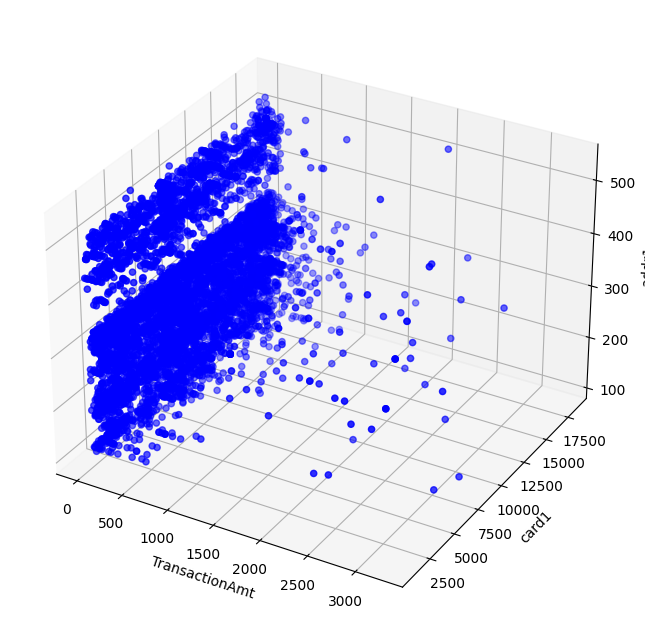

In [443]:
show3D_transaction_data(reduced_transaction_df, 'TransactionAmt', 'card1', 'addr1')

13. Create an alternate visualisation function for visualising fraud entries only, in red `show3D_transation_data _fraud_only(transac_dataset, x_axis_name, y_axis_name,z_axis_name)` 

In [444]:
def show3D_transaction_data_fraud_only(df, x_axis_name, y_axis_name, z_axis_name):
    fraud_dataset = df[df['isFraud'] == 1]

    fig = plt.figure(figsize=(12, 8))

    ax = fig.add_subplot(111, projection='3d')

    x_data = fraud_dataset[x_axis_name]
    y_data = fraud_dataset[y_axis_name]
    z_data = fraud_dataset[z_axis_name]

    ax.scatter(x_data, y_data, z_data, c='r', marker='o')

    ax.set_xlabel(x_axis_name)
    ax.set_ylabel(y_axis_name)
    ax.set_zlabel(z_axis_name)
    ax.set_title('Fraudulent transactions')

    plt.show()

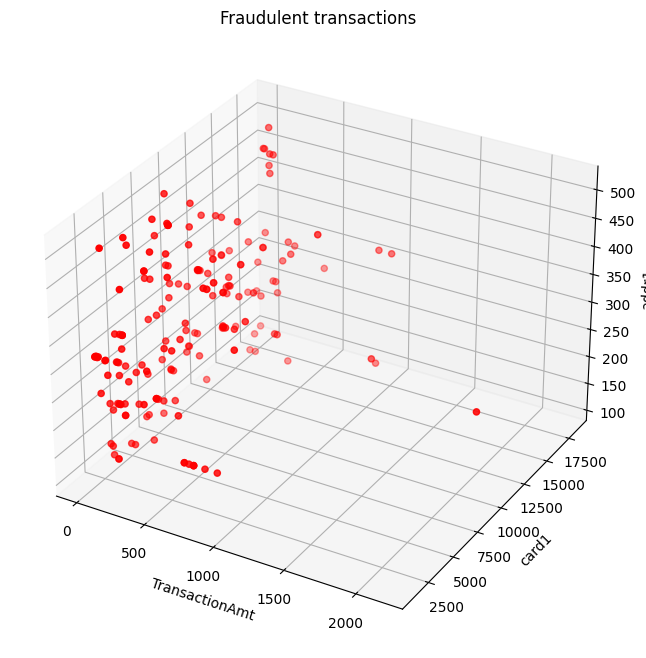

In [445]:
show3D_transaction_data_fraud_only(reduced_transaction_df, 'TransactionAmt', 'card1', 'addr1')

## Data cleaning
14. Perform one-hot encoding of categorical data

In [446]:
categorical_df = reduced_transaction_df[categorical_columns]
categorical_df.head()

,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN
1,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,outlook.com,NaN,T,T,T,M0,F,F,F,F,F
3,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We apply the one hot encoding only to the categorical columns

In [447]:
one_hot_encoded_df = get_one_hot_encoded_dataframe(categorical_df)

We need to drop the categorical columns from the original dataset and add the new one hot encoded columns

In [448]:
reduced_transaction_df = reduced_transaction_df.drop(categorical_columns, axis=1)
reduced_transaction_df = pd.concat([reduced_transaction_df, one_hot_encoded_df], axis=1)

15. Remove NaN (Not a number) values by imputation of the mean of the column

Tips:
- Do not forget to transform the resulting data structure in Pandas Dataframe again
- Do not forget to keep the column names for the Dataframe

In [449]:
reduced_transaction_df = remove_nan_through_mean_imputation(reduced_transaction_df)

In [450]:
reduced_transaction_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,dist1,dist2,C1,C2,C3,C4,...,M5_F,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T
0,2987000,0,86400,68.5,19.000000,292.621333,1.0,1.0,0.0,0.0,...,1,0,0,1,0,0,0,0,0,0
1,2987001,0,86401,29.0,116.262567,292.621333,1.0,1.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,0
2,2987002,0,86469,59.0,287.000000,292.621333,1.0,1.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
3,2987003,0,86499,50.0,116.262567,292.621333,2.0,5.0,0.0,0.0,...,0,1,1,0,0,0,0,0,0,0
4,2987004,0,86506,50.0,116.262567,292.621333,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


16. Control that no NaN value remain in the dataframe

In [451]:
reduced_transaction_df.isna().any().any()

False

## Outlier detection
Isolation Forests

17. Extract outliers using sklearn.ensemble.IsolationForests, using and
outliers_fraction = 0.03. Control the numbers of outliers.
Typs:
- clf.predict() returns outliers marked as -1
- Add an additional column ‘outliers’ to your dataframe as follows to store outlier status:
- How many outliers found in unsupervised manner are labelled as fraudulent transactions
(‘isFraud’) ?
- Print fraudulent outliers. What do you observe?

In [452]:
iforest = IsolationForest(contamination=0.03, random_state=42)
iforest.fit(reduced_transaction_df)
dtransact_outliers = iforest.predict(reduced_transaction_df)

/Users/rb2/miniconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [453]:
reduced_transaction_df['if_outliers'] = dtransact_outliers

In [454]:
print("Number of outliers which are fraud: ", get_nb_of_rows(reduced_transaction_df[(reduced_transaction_df['if_outliers'] == -1) & (reduced_transaction_df['isFraud'] == 1)]))

Number of outliers which are fraud:  38


In [455]:
reduced_transaction_df[(reduced_transaction_df['if_outliers'] == -1) & (reduced_transaction_df['isFraud'] == 1)]

,TransactionID,isFraud,TransactionDT,TransactionAmt,dist1,dist2,C1,C2,C3,C4,...,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T,if_outliers
243,2987243,1,90246,37.098,116.262567,292.621333,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,-1
245,2987245,1,90295,37.098,116.262567,292.621333,2.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,-1
367,2987367,1,92350,225.000,116.262567,292.621333,7.0,6.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,-1
405,2987405,1,92999,90.570,116.262567,292.621333,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,-1
630,2987630,1,97843,12.326,116.262567,7.000000,1.0,2.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,-1
683,2987683,1,99584,124.344,116.262567,7.000000,1.0,3.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,-1
780,2987780,1,102188,10.000,116.262567,292.621333,35.0,29.0,0.0,21.0,...,0,0,0,0,0,0,0,0,0,-1
781,2987781,1,102193,10.000,116.262567,292.621333,35.0,29.0,0.0,21.0,...,0,0,0,0,0,0,0,0,0,-1
869,2987869,1,106603,83.380,116.262567,9.000000,1.0,4.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,-1
1706,2988706,1,137934,450.000,116.262567,292.621333,3.0,3.0,0.0,3.0,...,0,0,0,0,0,0,0,0,0,-1


We can observe that the fraudulent outliers often share the same value for the `card1` , `dist1` and other columns. This is a good indicator of anomaly.

18. Create yet another visualisation function for visualising IsolationForest outliers entries only, in red

In [456]:

def show3D_transation_data_if_outliers_only(transac_dataset, x_axis_name, y_axis_name, z_axis_name):
    fraud_dataset = transac_dataset[(transac_dataset['if_outliers'] == -1)]

    fig = plt.figure(figsize=(12, 8))

    ax = fig.add_subplot(111, projection='3d')

    x_data = fraud_dataset[x_axis_name]
    y_data = fraud_dataset[y_axis_name]
    z_data = fraud_dataset[z_axis_name]

    ax.scatter(x_data, y_data, z_data, c='r', marker='o')

    ax.set_xlabel(x_axis_name)
    ax.set_ylabel(y_axis_name)
    ax.set_zlabel(z_axis_name)
    ax.set_title('Isolation Forest outliers')

    plt.show()

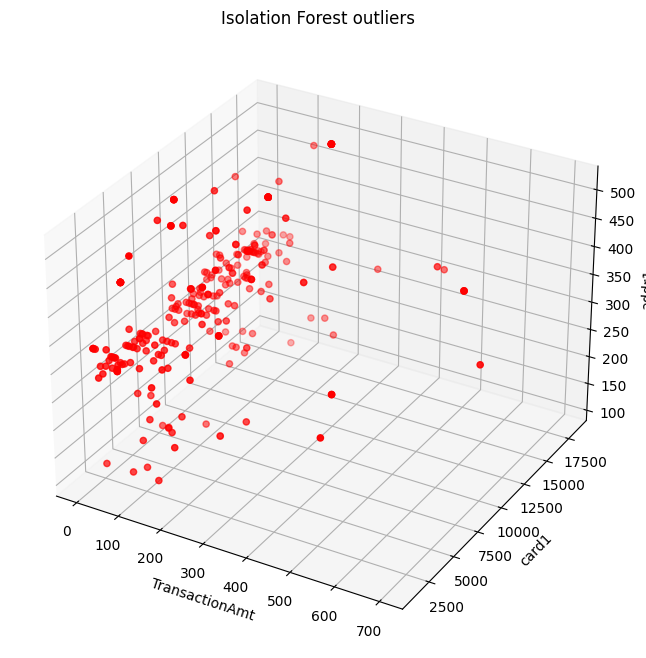

In [481]:
show3D_transation_data_if_outliers_only(reduced_transaction_df, 'TransactionAmt', 'card1', 'addr1')

19. Extract outliers using sklearn.neighbors. LocalOutlierFactor, using and outliers_fraction = 0.03. Control the numbers of outliers.

Typs:
- clf.predict() returns outliers marked as -1
- Add an additional column ‘lof_outliers’ to your dataframe as follows to store outlier status:
- How many outliers found in unsupervised manner are labelled as fraudulent transactions(‘isFraud’) ?

In [458]:
lof_outliers = get_list_of_lof_outliers(reduced_transaction_df, 0.03)

lof = LocalOutlierFactor(contamination=0.03)
lof_outliers = lof.fit_predict(reduced_transaction_df)

In [459]:
reduced_transaction_df['lof_outliers'] = lof_outliers

In [460]:
print("Number of outliers which are fraud: ", get_nb_of_rows(reduced_transaction_df[(reduced_transaction_df['lof_outliers'] == -1) & (reduced_transaction_df['isFraud'] == 1)]))

Number of outliers which are fraud:  17


20. Create yet another visualisation function for visualising LOF outliers entries only, in red

In [461]:

def show3D_transation_data_lof_outliers_only(transac_dataset, x_axis_name, y_axis_name, z_axis_name):
    fraud_dataset = transac_dataset[(transac_dataset['lof_outliers'] == -1)]

    fig = plt.figure(figsize=(12, 8))

    ax = fig.add_subplot(111, projection='3d')

    x_data = fraud_dataset[x_axis_name]
    y_data = fraud_dataset[y_axis_name]
    z_data = fraud_dataset[z_axis_name]

    ax.scatter(x_data, y_data, z_data, c='r', marker='o')

    ax.set_xlabel(x_axis_name)
    ax.set_ylabel(y_axis_name)
    ax.set_zlabel(z_axis_name)
    ax.set_title('Local Outlier Factor')

    plt.show()

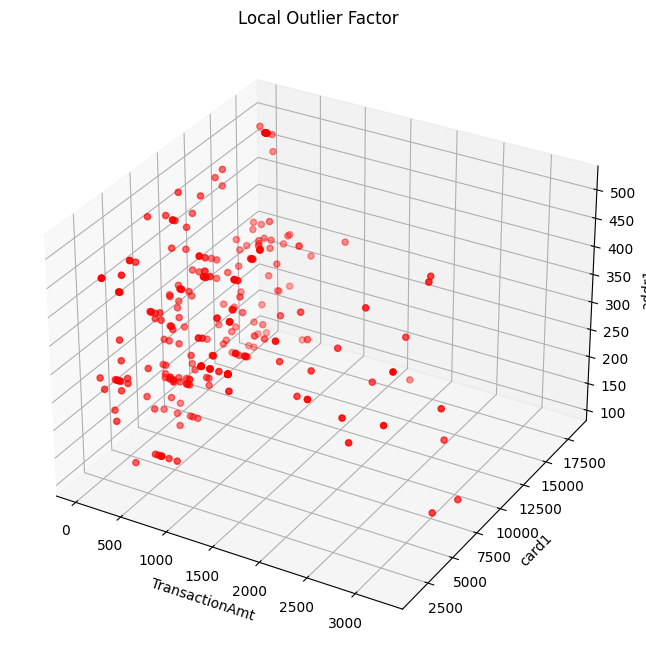

In [483]:
show3D_transation_data_lof_outliers_only(reduced_transaction_df, 'TransactionAmt', 'card1', 'addr1')

21. Control the complementarity between the 2 algorithms

21.1. How many outliers are common to IsolationForest and LOF?

In [464]:
common_outliers = reduced_transaction_df[(reduced_transaction_df['if_outliers'] == -1) & (reduced_transaction_df['lof_outliers'] == -1)]
print("Number of common outliers: ", get_nb_of_rows(common_outliers))

Number of common outliers:  24


21.2. What do you deduce for building unsupervised outlier detectors?

We experienced two algorithms to detect outliers. In conclusion it is interesting to use both techniques because they are complementary, the Isolation Forest technique is more efficient to detect outliers in high dimensional data, while the LOF technique is more efficient to detect outliers locally in clusters. This could lead to build a more efficient unsupervised outlier detector.